In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### About data  

 We have received claims data of Health insurance paid to 1340 patients/policyholders.

 - Insurance claim dataset comprise of 1,340 patient/policyholders with details (10 attributes) that describe their health status such as BMI, bloodpressure, Diabetic, Smoking habits and other demographic information such as age, gender, region, no. of children

 - Other attribute is "Claim" which is our target variable

### Business Problem
 
To predict insurance claim amt and identify factors leading to high insurance claim amt which can help business in mainly two ways 

i. Identifying high risk segments useful for Insurance underwriting 

ii.Develop risk based premium model i.e it would help build efficient premium rate card/matrix based on factors affecting the insurance claim amt 

#### Reading data

In [4]:
Ins1=pd.read_csv("C:\\Users\\alaghvk\\Downloads\\insurance_data.csv")
Ins=Ins1.copy()

In [5]:
Ins.shape # to know number of rows and columns 

(1340, 10)

In [6]:
Ins.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,1340.0,NaN,NaN,NaN,670.5,386.968991,1.0,335.75,670.5,1005.25,1340.0
age,1335.0,NaN,NaN,NaN,38.078652,11.102924,18.0,29.0,38.0,47.0,60.0
gender,1340,2,male,678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1340.0,NaN,NaN,NaN,30.668955,6.106735,16.0,26.275,30.4,34.7,53.1
bloodpressure,1340.0,NaN,NaN,NaN,94.157463,11.434712,80.0,86.0,92.0,99.0,140.0
diabetic,1340,2,No,698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,1340.0,NaN,NaN,NaN,1.093284,1.205334,0.0,0.0,1.0,2.0,5.0
smoker,1340,2,No,1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1337,4,southeast,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
claim,1340.0,NaN,NaN,NaN,13252.745642,12109.609288,1121.87,4719.685,9369.615,16604.305,63770.43


In [7]:
Ins.dtypes ## To know the data type of the variables in the dataset

PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object

#### Types of variables in Insurance dataset

##### A. Numerical variables - 

i.  Continous variables: age, bmi, bloodpressure, claim

ii. Discrete variables:  children 

##### B. Categorical variables - 
gender, diabetic, smoker, region

### Data appreciation (Relevance, quality, availability of data)

#### Fixing missing values through Imputation



In [8]:
Ins.isnull().sum() ## To check null values in the dataset

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

Missing value observed in only two variables - Age and Region

 [1] - Age

We are using imputation as a technique to replace null values with Mean for "Age" variable due to 

a. Lesser no. of null values i.e 5 (less than 5% of the total sample)

b. it is indicating normal distribution (Checked through visualisation below in univariate analysis)

In [34]:
Ins['age'].fillna(Ins['age'].mean(),inplace=True)

[2] - Region

Replacing missing values of a categorical variable with the mode due to lesser no. of null values i.e 3

In [33]:
Ins['region'].fillna(Ins.region.mode()[0],inplace=True)

In [11]:
# To re-check if null value is replaced with above treatment
Ins.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [12]:
# or
Ins.isna().apply(pd.value_counts) 

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
False,1340,1340,1340,1340,1340,1340,1340,1340,1340,1340


## Exploratory Data Analysis

## I. Univariate Analysis

#### A. Summary statistics

In [13]:
Ins.describe() ## Overall stats summary of numerical variables in the dataset

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.082175,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


#### B. Data Visualisation

##### B.1 Continous Variable - Age /BMI/BP/Claim

#### 1. Age

Text(0.5, 0, 'Age')

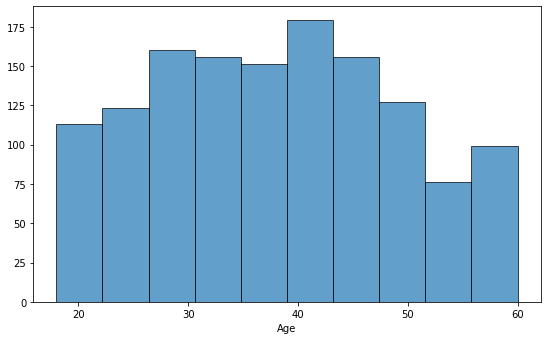

In [14]:
plt.figure(figsize= (20,25))
plt.subplot(4,2,1)
plt.hist(Ins.age, edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

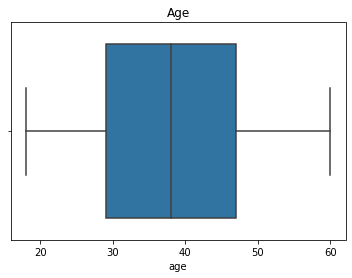

In [15]:
ax = sns.boxplot(Ins['age'])
ax.set_title('Age')
plt.show(ax)

In [16]:
Ins.age.describe()

count    1340.000000
mean       38.078652
std        11.082175
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

##### Observation: 
- Avg age of patient is 38 years which is same as median indicating towards normal distribution of age; 
- Patient/policyholder's age ranges from 18-60 years; Apparently in our sample, no claims paid to senior citizen(>60 yrs old) 
- No presence of outliers in Age variable
- Only 25% of patients/policyholders are aged above 47 years; Majority claims paid younger /middle aged patients

##### 2. BMI

Text(0.5, 0, 'BMI')

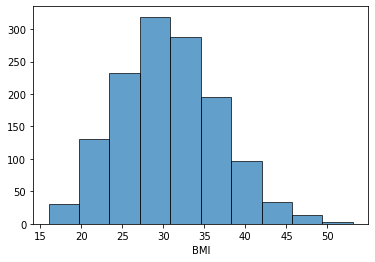

In [17]:
#plt.figure(figsize= (35,30))
plt.hist(Ins.bmi,edgecolor = 'black', alpha = 0.7)
plt.xlabel('BMI')

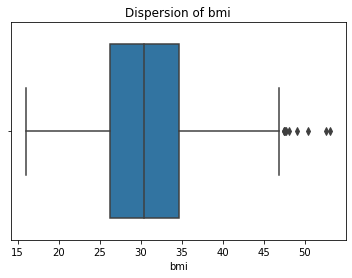

In [18]:
ax = sns.boxplot(Ins['bmi'])
ax.set_title("Dispersion of bmi")
plt.show(ax)

In [19]:
Ins.bmi.describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [20]:
# To check proportion less than 18.5 BMI value in our data
Ins.bmi[Ins.bmi<18.5].count()

20

In [21]:
# Finding count of outliers

In [22]:
def find_outliers_IQR(Ins):
    q1=Ins.quantile(0.25)
    q3=Ins.quantile(0.75)
    IQR=q3-q1
    outliers = Ins[((Ins<(q1-1.5*IQR)) | (Ins>(q3+1.5*IQR)))]
    return outliers

In [23]:
outliers = find_outliers_IQR(Ins["bmi"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 9
max outlier value: 53.1
min outlier value: 47.4


9       53.1
141     50.4
579     47.5
675     48.1
696     47.7
802     49.1
1299    52.6
1306    47.6
1339    47.4
Name: bmi, dtype: float64

#### Observation

Concept:
- It stands for Body Mass Index (BMI) which is calculated using a person’s weight in kg(or pounds) divided by the sq of height(m or ft).
- High BMI indicate high body fatness
- BMI range from 18.5 - 24.9 is considered as healthy; Value <18.5 indicates underweight whereas value >24.9 indicates overweight

Key Highlights:
- Range of BMI observed in our sample is 16-53
- Mean is 30.6 and Median is 30.4 indicating towards normal distribution
- 75% patients has BMI more than 26.2 (overweight) which is not healthy; Only 20 observation seen with BMI less than the min std i.e 18.5
- Presence of 9 outliers observed with value approx more than 47-53

#### 3. Bloodpressure

Text(0.5, 0, 'Bloodpressure')

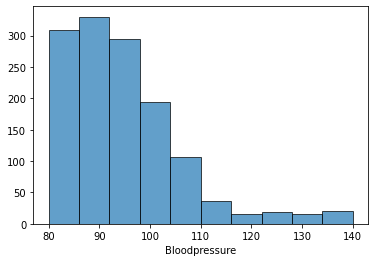

In [24]:
#plt.figure(figsize= (20,15))
plt.hist(Ins.bloodpressure,edgecolor = 'black', alpha = 0.7)
plt.xlabel('Bloodpressure')

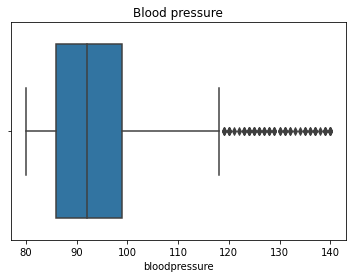

In [25]:
ax= sns.boxplot(Ins['bloodpressure'])
ax.set_title("Blood pressure")
plt.show(ax)

In [26]:
Ins.bloodpressure.describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

In [27]:
outliers = find_outliers_IQR(Ins["bloodpressure"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 62
max outlier value: 140
min outlier value: 119


1147    128
1150    135
1152    128
1153    126
1154    126
       ... 
1325    133
1332    120
1333    127
1334    125
1336    120
Name: bloodpressure, Length: 62, dtype: int64

#### Observation
#### Assumption: 
- Inabsence of bifurcation of diastolic and systolic we have assumed the observation under this variable 
pertains to diastolic looking at the range of value present in the dataset i.e 80-140; It is highly unlikely that systolic value falls to such a low value of 80

#### Concept:
- If diastolic BP is >90 it is not considered as normal or healthy and can have serious impact on heart

#### Key highlights:
- BP data is skewed towards right
- Range of BP in our data is from 80-140
- We observe that 50% of patients(92) have BP higher than the std heathy range i.e 90 which indicates that BP could be one the important factors contributing towards high claim amt; Same needs to be further explored 
- Presence of 62 outlier observed with value more than 118 which is extremely high in case of diastolic BP reading

#### 4. Claims

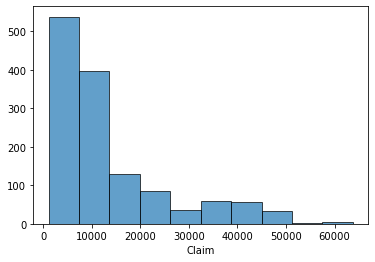

In [28]:
#plt.figure(figsize= (20,15))
plt.hist(Ins.claim, edgecolor = 'black', alpha = 0.7)
plt.xlabel('Claim')
plt.show()

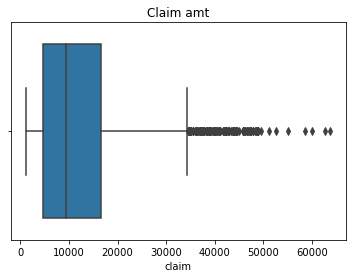

In [29]:
ax=sns.boxplot(Ins["claim"])
ax.set_title("Claim amt")
plt.show(ax)

In [30]:
Ins.claim.describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

In [31]:
outliers = find_outliers_IQR(Ins["claim"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 141
max outlier value: 63770.43
min outlier value: 34439.86


1199    34439.86
1200    34472.84
1201    34617.84
1202    34672.15
1203    34779.62
          ...   
1335    55135.40
1336    58571.07
1337    60021.40
1338    62592.87
1339    63770.43
Name: claim, Length: 141, dtype: float64

#### Observation
- Claim paid to patients in our sample ranges from 1121-63770
- Avg claim paid to patient is 13.3K which is on lower side 
- 25% of patients were paid more than 16.6 K which is higher than the avg claim paid
- Claim paid data is right skewed which indicates that majority claim paid is low and severity of illness is less
- Presence of high no. of outlier with claim amt more than approx 34K to 63K 

##### B.2 Categorical/Discrete numerical Variables

NameError: name 'smoker' is not defined

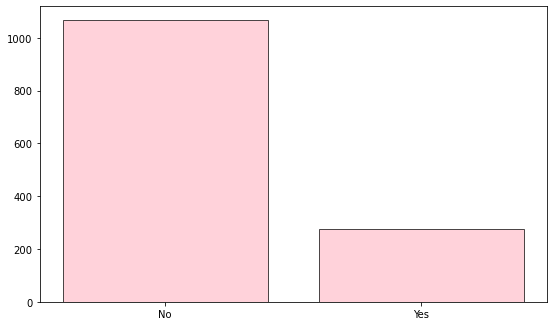

In [32]:
#Plots to see the distribution of the catagorical features individually

plt.figure(figsize=(20,25))


x = Ins.smoker.value_counts().index    #Values for x-axis
y = [Ins['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

ax = plt.subplot(4,2,1)
plt.bar(x,y, align='center',edgecolor = 'black', color='pink', alpha = 0.7)  #plot a bar chart
ax.text(0.1, 990, '{}%' .format(str(round(smoker[1][0]/sum(smoker[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax.text(1.1, 190, '{}%' .format(str(round(smoker[1][1]/sum(smoker[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = Ins.gender.value_counts().index    #Values for x-axis
y1 = [Ins['gender'].value_counts()[j] for j in x1]   # Count of each class on y-axis

ax1 = plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',edgecolor = 'black', color='pink', alpha = 0.7)  #plot a barchart
ax1.text(0.1, 640, '{}%' .format(str(round(gender[1][1]/sum(gender[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax1.text(1.1, 620, '{}%' .format(str(round(gender[1][0]/sum(gender[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')


x2 = Ins.diabetic.value_counts().index    #Values for x-axis
y2 = [Ins['diabetic'].value_counts()[j] for j in x2]   # Count of each class on y-axis

ax2 = plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',edgecolor = 'black',color='pink',alpha = 0.7)  #plot a bar chart
ax2.text(0.1, 660, '{}%' .format(str(round(diabetic[1][0]/sum(diabetic[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax2.text(1.1, 600, '{}%' .format(str(round(diabetic[1][1]/sum(diabetic[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
plt.xlabel('diabetic')
plt.ylabel('Count')
plt.title('Diabetic distribution')

x3 = Ins.region.value_counts().index    #Values for x-axis
y3 = [Ins['region'].value_counts()[k] for k in x3]   # Count of each class on y-axis

ax3 = plt.subplot(4,2,4)
sns.barplot(x=list(region[0]), y=list(region[1]), ax=ax3, color='pink');
#plt.bar(x3,y3, align='center',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
ax3.text(0.2, 200, '{}%' .format(str(round(region[1][0]/sum(region[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax3.text(1.2, 320, '{}%' .format(str(round(region[1][1]/sum(region[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax3.text(2.2, 420, '{}%' .format(str(round(region[1][2]/sum(region[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
ax3.text(3.2, 290, '{}%' .format(str(round(region[1][3]/sum(region[1])*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Region distribution")

plt.show()

ax4 = plt.figure(figsize=(6,6))
sns.countplot(x='children', data=Ins)
plt.title("Children distribution")
plt.show()

In [ ]:
Ins.children.value_counts()

#### Observations on categorical / discrete variable

#### Smoker: 
Distribution of Non smoker is high viz Smoker i.e 80:20 ratio
    
#### Gender: 
Distribution of gender - Male vs Female is almost similar i.e 50.6% & 49.4% resp
    
##### Diabetic: 
Distribution of diabetic & non diabetic is not much of a difference 47.91% & 52.09% resp
    
##### Region: 
Majority patients belongs to southeast region 33% followed by northwest region with 26%
    
#### Children: 
Majority patients(43%) do not have children and only 3% patients have > 3 children

In [ ]:
drop = Ins.drop('PatientID',axis=1)  #so dropping id column which is a nominal value and does not add value to the model

## II. Bi- Variate Analysis

#### Questions for further exploration basis univariate analysis:
i.   If high claims are paid to high aged patients as compared to younger patients; 

##### Rationale: Higher age people are more vulnerable to illness due to high age factor

ii.  Whether claims are high towards patients with higher BMI of patient; 

##### Rationale: Patients with higher BMI indicates they are unhealthy and would be more prone to illness

iii. Whether there is co-relation between two features -BMI and BP 

##### Rationale: Intuitively it feels that there could be a collinearity between BMI and BP  because high BMI leads to obsesity which can  impact heart

iv.  Whether high claim amt to smokers as compared to non smoker

##### Rationale: Simply, because smoking is unhealthy and adverse effects on health

v.   Whether there is any particular region where claim paid is high

##### Rationale:  To probe further if there are other factors that is elevating the claims payment in particular region

vi.  Whether gender influence claims payment 

##### Rationale:  

vii.  Whether claim is paid to Diabetic patient is high as compared to non-diabetic patients 

##### Rationale: Having Diabeties is anyway a serious concern towards health and if same is not in control range  it aggravates health issues

viii. Whether claims paid is high to patients with high BP levels

##### Rationale: Patients with high BP levels is concerning and has impact on heart and increase possibility of heart diesesases

In [ ]:
corr = Ins.corr()
corr.style.background_gradient()

#### Observation:
i. Not very significant correlation observed between any feature with target variable; However there is presence of some co-relation observed between claim & bloodpressure(0.53) & claim & bmi(0.19)

ii. Among feature variable, co-relation between BP & BMI observed (0.14) which is low

##### Question 1- Is higher claim paid to high aged patients as compared to younger patients; As with higher age people are more likely to be prone to illness

In [ ]:
sns.lineplot(data=Ins, x="age", y="claim")

#### Observation: We see no specific trend/pattern or co -relation between age and claims paid; 

#### Highest claim paid to a patient aged 22-23 yrs old which appears to be a one off scenario and does not form part of any trend/pattern 

##### Question 2- Whether higher claims  paid to patients with higher BMI as higher BMI is unhealthy indicates obesity and can be more prone to illness

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(y='claim', x='bmi',data=Ins)
plt.title('BMI and claim')
plt.show()

##### Observation: We see high claim  (>30 K ) is paid only towards patients with high BMI>30 ; 

##### With this observation we will valid this claim through Hypothesis testing
##### Additionally, it also gives an indication that there could be other factors coupled with BMI that contributes to higher claim payment which can be explored through  multi variate analysis

##### Question 3- Whether higher claim amt paid to smokers as compared to non smoker

In [ ]:
#Plotting a side ny side boxplot 
Ins.boxplot(column="claim", notch=True, ## Notch here is mentioned to change the shape of boxplot
                 by="smoker",
                grid=False,
                figsize=(8,6),
                rot=45) ## Change the angle of the label to avoid cluttering

plt.show()

##### Observation: Higher claim payment made to patients with history of smoking in comparison with the patients with no smoking habits
(Claim amt is more than thrice the claim amt paid towards smokers viz non smokers)

##### Question 4: Is claim paid / higher claim paid to patients with higher BP

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(y='claim', x='bloodpressure',data=Ins)
plt.title('Bloodpressure and claim')
plt.show()

##### Observation: Patients with high BP level i.e >110 are paid higher claim amt >29K

##### Question 5: Which region contribute towards higher claim payment

In [ ]:
#Side by Side boxplot

Ins.boxplot(column="claim", notch=True, ## Notch here is mentioned to change the shape of boxplot
                 by="region",
                grid=False,
                figsize=(8,6),
                rot=45) ## Change the angle of the label to avoid cluttering

plt.show()

##### Observation: We have received high no. of claims from south east which we already deduced from univariate analysis 
##### however higher claim amt is paid in northeast region

##### Question 6: Whether claim paid higher towards Diabetic patient more prone health concerns 

In [ ]:
# Side by Side boxplot

#Plotting a boxplot for the variable MPG
Ins.boxplot(column="claim", notch=True, ## Notch here is mentioned to change the shape of boxplot
                 by="diabetic",
                grid=False,
                figsize=(8,6),
                rot=45) ## Change the angle of the label to avoid cluttering

plt.show()

##### Obseration: We see no trend/pattern between diabetic and non diabetic patients with claims

##### Question 7: Is blood pressure and BMI correlated

In [ ]:
Ins.plot(kind="scatter",
             figsize=(6,5),
             x="bloodpressure", y="bmi",
             color="black")

plt.show()

##### Observation: Patients with BP >110 generally have BMI more than the std range i.e 25

#### Question 8: Has gender to play any role in claim payment

In [ ]:
#Plotting a side ny side boxplot 
Ins.boxplot(column="claim", notch=True, ## Notch here is mentioned to change the shape of boxplot
                 by="gender",
                grid=False,
                figsize=(8,6),
                rot=45) ## Change the angle of the label to avoid cluttering

plt.show()

##### Obseration: We observe in our sample claims are slightly towards male patients as compared to female patients

## III. Multi variate Analysis

i. Relationship b/w Age, Gender , Claim

#### Observation: 

#### From age group 18-22 years claim payment is made to males only whereas in from age group 50-60 claim payment is made to females

i.  It could be that insurance claim is actually not paid in the aforesaid age groups for respective gender(Highly unlikely though), OR 

ii. There could be a scenario of sampling issue

In [ ]:
g = sns.lmplot(x="age", y="claim", hue="gender", data=Ins)

ii. Relationship b/w BMI, Smoker , Claim

#### Observation:

#### We observed in our sample that claim payment is showing an increasing trend for patients with high BMI and who is a smoker indicating that combination of unhealthy habit such as Smoking with high BMI results in high risk thus paying high claim amt;


Low claim payment paid to non smokers and through this visualisation we observe that non smoker irrespective of BMI range is likey to have low risk of illness thus paid low claim amt


In [ ]:
g = sns.lmplot(x="bmi", y="claim", hue="smoker", data=Ins)
plt.title('Relationship - BMI to Claim to Smoking', fontsize='12', fontweight='bold')

iii. Relationship b/w Region, Smoker , Claim

#### Observation:

#### We observed in our sample no. of  smoker male patients is high in south east region. Claim payment is also high in the said region

In [ ]:
g = sns.catplot(x="region", y="claim", hue="smoker",
                col="gender", data=Ins,
                height=5, aspect=.8)

## Hypothesis testing

##### Hypo 1 : High claims paid to patients with smoking habits as compared to non smoking patients

In [ ]:
# T-test to check independency of claim on smoker

Ho = "The average claim of smokers is less than or equal to nonsmokers"   # Stating the Null Hypothesis
Ha = "The average claim of smokers is greater than nonsmokers"            # Stating the Alternate Hypothesis

x = np.array(Ins[Ins.smoker == 'Yes'].claim)  # Selecting claim values corresponding to smoker as an array
y = np.array(Ins[Ins.smoker == 'No'].claim) # Selecting claim values corresponding to non-smoker as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha}; Thus, rejecting Null hypothesis as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho}; Thus, failed to reject Nul l hypothesis as the p_value ({p_value.round(3)}) > 0.05')

#### Hypo 2: High claims paid to patients with BMI >30

In [ ]:
m1=Ins.claim[Ins.bmi>=32].mean()
m1

In [ ]:
m2=Ins.claim[Ins.bmi<32].mean()
m2

In [ ]:
sd1=Ins.claim[Ins.bmi>=32].std()
sd1

In [ ]:
sd2=Ins.claim[Ins.bmi>=32].std()
sd2

In [ ]:
n1=Ins.claim[Ins.bmi>=32].count()
n1

In [ ]:
n2=Ins.claim[Ins.bmi<32].count()
n2

#### HO: Patients with high BMI >= 32 has high claim  or mu_claim(high bmi)<=mu_claim(low bmi) or  mu_claim(high bmi)-mu_claim(low bmi)<=0
#### H1: Patients with high BMI <32 has high claim  or mu_claim(high bmi)>mu_claim(low bmi) or mu_claim(high bmi)-mu_claim(low bmi)>0

In [ ]:
alpha=0.05
df=541-1
from scipy import stats
t_crit=stats.t.ppf(alpha,df)
t_crit

In [ ]:
t_test= (m1-m2)-(0)/np.sqrt((sd1/n1)+(sd2/n2))
t_test

In [ ]:
p_value=stats.t.cdf(t_test,df)
p_value

In [ ]:
## We cannot reject the null hypothesis as we have sufficient evidence 

## Model building

## 1. Feature transformation

#### I. Transformation of Categorical variable into binary variable

In [35]:
##This is performed for the ease of model fitting and accuracy
Ins.gender=Ins.gender.map({'male':0,'female':1})
Ins.smoker=Ins.smoker.map({'Yes':0,'No':1})
Ins.diabetic=Ins.diabetic.map({'Yes':0,'No':1})

#### II. One-Hot encoding for Region variable

In [36]:
# iCreating dummy value for variable region same as one hot encoding

dummy=pd.get_dummies(Ins["region"])
dummy

,northeast,northwest,southeast,southwest
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1335,0,1,0,0
1336,1,0,0,0
1337,0,1,0,0
1338,0,0,1,0


In [37]:
# Adding dummy variable to the dataset and dropping original variable "Region"
Ins = pd.concat([Ins, dummy], axis=1).drop('region', axis=1)

#### III. Creating bins for continous variables 

In [38]:
Ins.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,northeast,northwest,southeast,southwest
0,1,39.000000,0,23.2,91,0,0,1,1121.87,0,0,1,0
1,2,24.000000,0,30.1,87,1,0,1,1131.51,0,0,1,0
2,3,38.078652,0,33.3,82,0,0,1,1135.94,0,0,1,0
3,4,38.078652,0,33.7,80,1,0,1,1136.40,0,1,0,0
4,5,38.078652,0,34.1,100,1,0,1,1137.01,0,1,0,0


In [39]:
# Binning of BMI variable with labels

Ins['BMIgroup']=pd.cut(x=Ins['bmi'], bins=[11, 18,25,32,39,46,53], 
                        labels=["Very Low", "Standard","Moderate", "High","Very high", "Extremely High"])
print(Ins.head())

   PatientID        age  gender   bmi  bloodpressure  diabetic  children  \
0          1  39.000000       0  23.2             91         0         0   
1          2  24.000000       0  30.1             87         1         0   
2          3  38.078652       0  33.3             82         0         0   
3          4  38.078652       0  33.7             80         1         0   
4          5  38.078652       0  34.1            100         1         0   

   smoker    claim  northeast  northwest  southeast  southwest  BMIgroup  
0       1  1121.87          0          0          1          0  Standard  
1       1  1131.51          0          0          1          0  Moderate  
2       1  1135.94          0          0          1          0      High  
3       1  1136.40          0          1          0          0      High  
4       1  1137.01          0          1          0          0      High  


In [40]:
# Binning of BMI variable with numerical labels

Ins['BMIgroup1']=pd.cut(x=Ins['bmi'], bins=[11,18,25,32,39,46,54], 
                        labels=[1,2,3,4,5,6])
print(Ins.head())

   PatientID        age  gender   bmi  bloodpressure  diabetic  children  \
0          1  39.000000       0  23.2             91         0         0   
1          2  24.000000       0  30.1             87         1         0   
2          3  38.078652       0  33.3             82         0         0   
3          4  38.078652       0  33.7             80         1         0   
4          5  38.078652       0  34.1            100         1         0   

   smoker    claim  northeast  northwest  southeast  southwest  BMIgroup  \
0       1  1121.87          0          0          1          0  Standard   
1       1  1131.51          0          0          1          0  Moderate   
2       1  1135.94          0          0          1          0      High   
3       1  1136.40          0          1          0          0      High   
4       1  1137.01          0          1          0          0      High   

  BMIgroup1  
0         2  
1         3  
2         4  
3         4  
4         4  


In [41]:
# Changing the data tyoe of bin created for BMI form category to object

Ins["BMIgroup"] = Ins ["BMIgroup"].astype(object)

In [42]:

# Binning of BMI variable with labels

Ins['BPgroup']=pd.cut(x=Ins['bloodpressure'], bins=[70,80,90,100,110,120,130,140], 
                        labels=["Low", "Standard","Above standard","High","Very High","Extremely high", "At Risk"])
print(Ins.head())

   PatientID        age  gender   bmi  bloodpressure  diabetic  children  \
0          1  39.000000       0  23.2             91         0         0   
1          2  24.000000       0  30.1             87         1         0   
2          3  38.078652       0  33.3             82         0         0   
3          4  38.078652       0  33.7             80         1         0   
4          5  38.078652       0  34.1            100         1         0   

   smoker    claim  northeast  northwest  southeast  southwest  BMIgroup  \
0       1  1121.87          0          0          1          0  Standard   
1       1  1131.51          0          0          1          0  Moderate   
2       1  1135.94          0          0          1          0      High   
3       1  1136.40          0          1          0          0      High   
4       1  1137.01          0          1          0          0      High   

  BMIgroup1         BPgroup  
0         2  Above standard  
1         3        Standar

In [43]:
# Binning of BMI variable with numerical labels

Ins['BPgroup1']=pd.cut(x=Ins['bloodpressure'], bins=[70,80,90,100,110,120,130,140], 
                        labels=[1,2,3,4,5,6,7])
print(Ins.head())

   PatientID        age  gender   bmi  bloodpressure  diabetic  children  \
0          1  39.000000       0  23.2             91         0         0   
1          2  24.000000       0  30.1             87         1         0   
2          3  38.078652       0  33.3             82         0         0   
3          4  38.078652       0  33.7             80         1         0   
4          5  38.078652       0  34.1            100         1         0   

   smoker    claim  northeast  northwest  southeast  southwest  BMIgroup  \
0       1  1121.87          0          0          1          0  Standard   
1       1  1131.51          0          0          1          0  Moderate   
2       1  1135.94          0          0          1          0      High   
3       1  1136.40          0          1          0          0      High   
4       1  1137.01          0          1          0          0      High   

  BMIgroup1         BPgroup BPgroup1  
0         2  Above standard        3  
1       

#### IV. Log Transformation - Target variable

Text(0.5, 1.0, 'Log-Transformed claim Data')

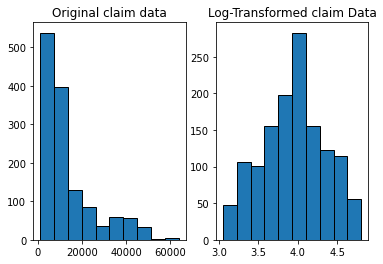

In [46]:
#create log-transformed data for claims (target variable) because claims data was right skewed

Ins['claim_log'] = np.log10(Ins["claim"])

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(Ins.claim, edgecolor='black')
axs[1].hist(Ins.claim_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original claim data')
axs[1].set_title('Log-Transformed claim Data')

In [47]:
Ins.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,northeast,northwest,southeast,southwest,BMIgroup,BMIgroup1,BPgroup,BPgroup1,claim_log
0,1,39.000000,0,23.2,91,0,0,1,1121.87,0,0,1,0,Standard,2,Above standard,3,3.049943
1,2,24.000000,0,30.1,87,1,0,1,1131.51,0,0,1,0,Moderate,3,Standard,2,3.053658
2,3,38.078652,0,33.3,82,0,0,1,1135.94,0,0,1,0,High,4,Standard,2,3.055355
3,4,38.078652,0,33.7,80,1,0,1,1136.40,0,1,0,0,High,4,Low,1,3.055531
4,5,38.078652,0,34.1,100,1,0,1,1137.01,0,1,0,0,High,4,Above standard,3,3.055764


## A .Model fitting through Decision Tree

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#For plotting a decision tree
from sklearn import tree

#for cross validation
from sklearn.model_selection import cross_val_score

In [49]:
Ins.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,northeast,northwest,southeast,southwest,BMIgroup,BMIgroup1,BPgroup,BPgroup1,claim_log
0,1,39.000000,0,23.2,91,0,0,1,1121.87,0,0,1,0,Standard,2,Above standard,3,3.049943
1,2,24.000000,0,30.1,87,1,0,1,1131.51,0,0,1,0,Moderate,3,Standard,2,3.053658
2,3,38.078652,0,33.3,82,0,0,1,1135.94,0,0,1,0,High,4,Standard,2,3.055355
3,4,38.078652,0,33.7,80,1,0,1,1136.40,0,1,0,0,High,4,Low,1,3.055531
4,5,38.078652,0,34.1,100,1,0,1,1137.01,0,1,0,0,High,4,Above standard,3,3.055764


#### 1. Setting Predictors and Target variable

In [57]:
X = Ins.drop(['PatientID','claim','claim_log','bmi',"BMIgroup","BPgroup","BMIgroup1","bloodpressure"], axis = 1) #Selecting feature
y = Ins.claim_log #Target

In [55]:
X.head()

,age,gender,diabetic,children,smoker,northeast,northwest,southeast,southwest,BMIgroup1,BPgroup1
0,39.000000,0,0,0,1,0,0,1,0,2,3
1,24.000000,0,1,0,1,0,0,1,0,3,2
2,38.078652,0,0,0,1,0,0,1,0,4,2
3,38.078652,0,1,0,1,0,1,0,0,4,1
4,38.078652,0,1,0,1,0,1,0,0,4,3


In [ ]:
y.head()

#### 2. Splitting data into Train-Valid-Test Split

In [58]:
# Train-test split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
#Train-Validation Split

In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

#### 3. Fitting a Regression Tree - Train data

In [62]:
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

#### 4. Prediction - Train-Valid data

In [63]:
y_pred = reg_tree.predict(X_valid)

#### 5. Evaluation of Model Performance - Train data

In [64]:
# MAE
np.mean(np.abs(np.exp(y_valid) - np.exp(y_pred)))

10.803505167081623

In [65]:
#MSE
np.mean((np.exp(y_valid))-(np.exp(y_pred)))**2

4.298951984901668

In [66]:
# RMSE
np.sqrt(np.mean((np.exp(y_valid))-(np.exp(y_pred)))**2)

2.073391421054324

In [67]:
# MAPE
np.mean(np.abs((np.exp(y_valid)-np.exp(y_pred))/(np.exp(y_valid))))*100

20.96137518684316

In [ ]:
#Plotting a Regression Tree

In [ ]:
fig, axes = plt.subplots(figsize=(6,6), dpi=300)

tree.plot_tree(reg_tree, feature_names=list(X), filled = False)

plt.show()

In [ ]:
# Checking optimal depth

In [ ]:
depth = np.arange(1,15)
mae = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid - y_pred))) #MAD

In [ ]:
plt.plot(depth, np.array(mae))
plt.show()

#### 6. Setting predictor and target varaible for test data

#### 7. Fitting Regressor tree - Test data

In [68]:
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_test,y_test)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

#### 8. Prediction - Test data

In [69]:
y_predt=reg_tree.predict(X_test)

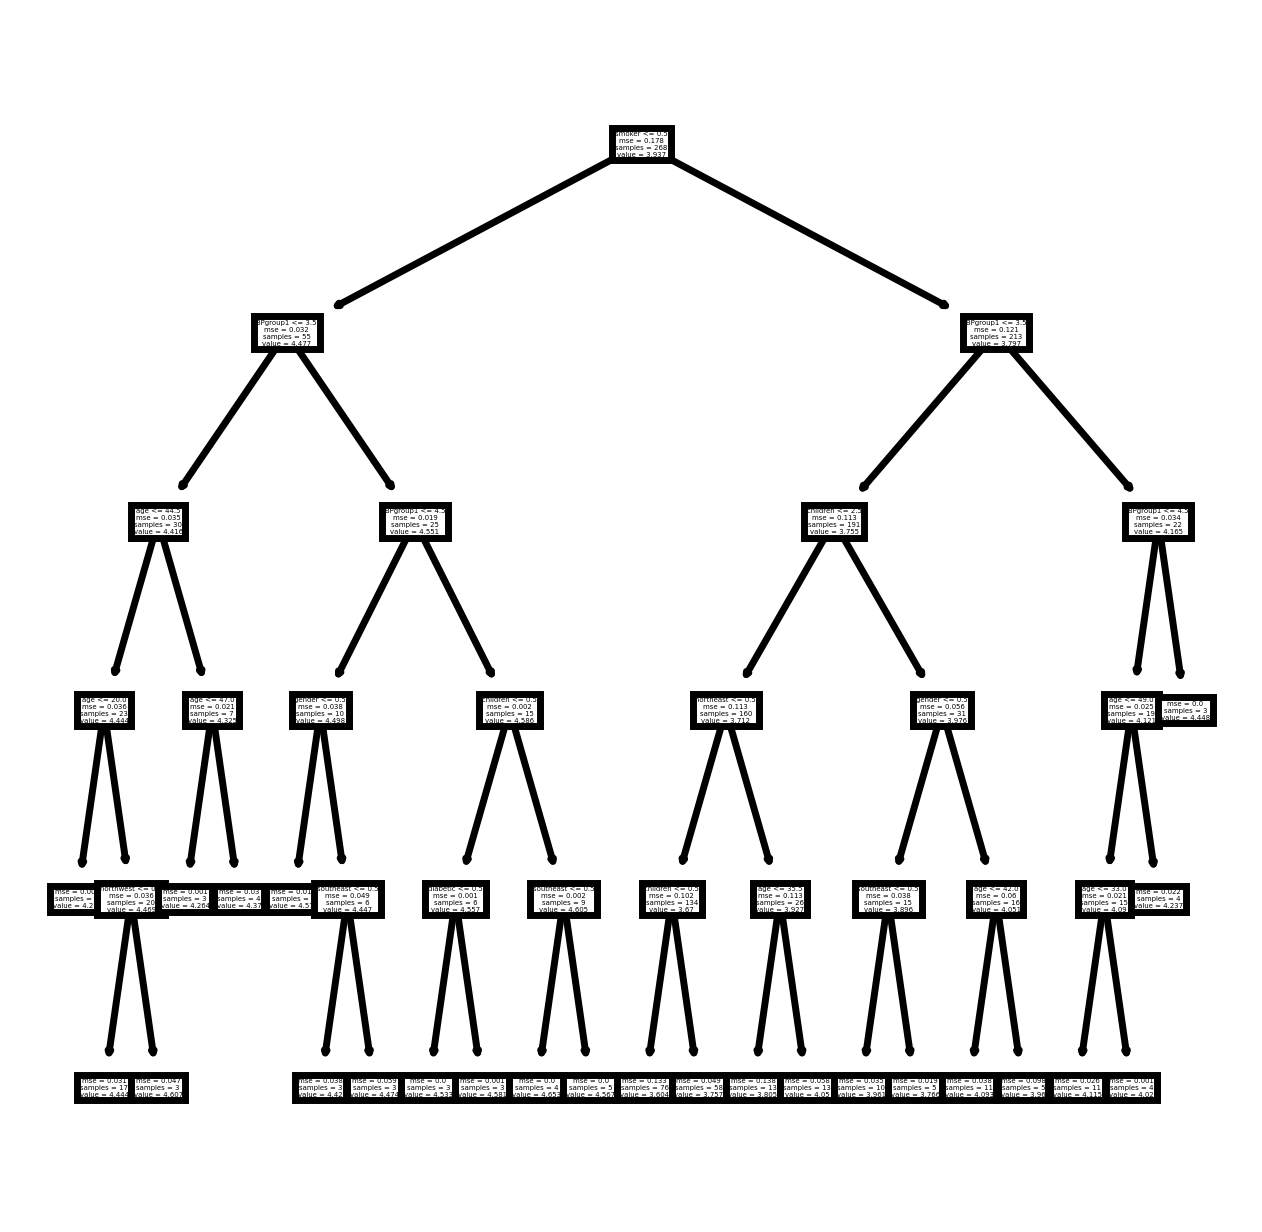

In [70]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_test), filled=False)
plt.savefig('TestModel2.jpeg')
plt.show()

#### 9. Evaluation of model performance

In [71]:
# MAE
np.mean(np.abs(np.exp(y_test) - np.exp(y_predt)))

9.869927924813686

In [72]:
# MSE
np.mean((np.exp(y_test))-(np.exp(y_predt)))**2

2.502550614885275

In [73]:
# RMSE
np.sqrt(np.mean((np.exp(y_valid))-(np.exp(y_pred)))**2)

2.073391421054324

In [74]:
# MAPE
np.mean(np.abs((np.exp(y_test)-np.exp(y_predt))/(np.exp(y_test))))*100

20.162883295566612

In [75]:
from sklearn import metrics

## Results from Decision Tree Model

MAPE of Decision Tree Regressor model on train data is 22% approx where as in test data is 20.09 which implies there is not much deviation in MAPE score for train and test data m

## B. Model fitting through Linear Regression

In [79]:
Ins.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,northeast,northwest,southeast,southwest,BMIgroup,BMIgroup1,BPgroup,BPgroup1,claim_log
0,1,39.000000,0,23.2,91,0,0,1,1121.87,0,0,1,0,Standard,2,Above standard,3,3.049943
1,2,24.000000,0,30.1,87,1,0,1,1131.51,0,0,1,0,Moderate,3,Standard,2,3.053658
2,3,38.078652,0,33.3,82,0,0,1,1135.94,0,0,1,0,High,4,Standard,2,3.055355
3,4,38.078652,0,33.7,80,1,0,1,1136.40,0,1,0,0,High,4,Low,1,3.055531
4,5,38.078652,0,34.1,100,1,0,1,1137.01,0,1,0,0,High,4,Above standard,3,3.055764


#### 1. Import libraries

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns


import statsmodels.api as sm
import statsmodels.tsa.api as smt

#### 2. Setting Predictors and Target variable

In [116]:
Ins.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,northeast,northwest,southeast,southwest,BMIgroup,BMIgroup1,BPgroup,BPgroup1,claim_log
0,1,39.000000,0,23.2,91,0,0,1,1121.87,0,0,1,0,Standard,2,Above standard,3,3.049943
1,2,24.000000,0,30.1,87,1,0,1,1131.51,0,0,1,0,Moderate,3,Standard,2,3.053658
2,3,38.078652,0,33.3,82,0,0,1,1135.94,0,0,1,0,High,4,Standard,2,3.055355
3,4,38.078652,0,33.7,80,1,0,1,1136.40,0,1,0,0,High,4,Low,1,3.055531
4,5,38.078652,0,34.1,100,1,0,1,1137.01,0,1,0,0,High,4,Above standard,3,3.055764


In [239]:
X1 = Ins.drop(['PatientID','claim','claim_log','bmi',"bloodpressure","BMIgroup","BPgroup","BMIgroup1"], axis = 1)  
y1 = Ins['claim_log']  #Target

In [240]:
X1.head()

,age,gender,diabetic,children,smoker,northeast,northwest,southeast,southwest,BPgroup1
0,39.000000,0,0,0,1,0,0,1,0,3
1,24.000000,0,1,0,1,0,0,1,0,2
2,38.078652,0,0,0,1,0,0,1,0,2
3,38.078652,0,1,0,1,0,1,0,0,1
4,38.078652,0,1,0,1,0,1,0,0,3


#### 3. Splitting dataset into train-valid-test 

In [241]:
#Train-test Split

In [242]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 100)

In [243]:
#Train-valid Split

In [244]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1_train, y1_train, test_size = 0.25, random_state = 100)

#### 4. Fitting Linear regression model - Train data

In [245]:
regressor = LinearRegression()
regressor.fit(X1_train,y1_train)

LinearRegression()

#### 5. Prediction - Train data

In [246]:
y_pred2 = regressor.predict(X1_valid)

#### 6. Accuracy measure - Train data

In [247]:
r2_score(y1_valid,y_pred2)

0.5042607615751046

In [248]:
# Adjusted r_square
import statsmodels.api as sm
import pandas as pd

#fit regression model
X1 = sm.add_constant(X1)
model = sm.OLS(y1_valid, X1_valid).fit()

#display adjusted R-squared
print(model.rsquared_adj)


0.5283004490812687


In [249]:
residual= y1_valid-y_pred2
residual

1303    0.265802
630     0.065907
20     -0.465016
601     0.094222
579     0.210458
          ...   
927     0.302514
641    -0.140945
415    -0.008407
21     -0.634946
344    -0.055065
Name: claim_log, Length: 268, dtype: float64

#### 7. Fitting Linear regression model - Test data

In [250]:
regressor = LinearRegression()
regressor.fit(X1_test,y1_test)

LinearRegression()

#### 8. Prediction - Test data

In [251]:
y_pred3 = regressor.predict(X1_test)

#### 9. Accuracy measure - Test data


In [252]:
r2_score(y1_test,y_pred3)

0.5413229018393269

In [253]:
# Adjusted r_square
import statsmodels.api as sm
import pandas as pd

#fit regression model
X1 = sm.add_constant(X1)
model = sm.OLS(y1_test, X1_test).fit()

#display adjusted R-squared
print(model.rsquared_adj)


0.5253225379500008


In [254]:
residual_1= y1_test-y_pred3
residual_1

12     -0.588741
306    -0.132405
318    -0.159849
816     0.325344
157    -0.260350
          ...   
714    -0.096097
664     0.282195
531     0.119003
537     0.034947
1018   -0.115152
Name: claim_log, Length: 268, dtype: float64

In [255]:
#regressor.predict([[add variables]])

In [256]:
pred_y_Ins=pd.DataFrame({'Actual claim':y1_test ,'Predicted claim':y_pred3, 'Difference': y1_test - y_pred3})
pred_y_Ins

,Actual claim,Predicted claim,Difference
12,3.094408,3.683149,-0.588741
306,3.646902,3.779307,-0.132405
318,3.656048,3.815897,-0.159849
816,4.062741,3.737397,0.325344
157,3.412603,3.672953,-0.260350
...,...,...,...
714,4.001874,4.097972,-0.096097
664,3.967715,3.685519,0.282195
531,3.864811,3.745808,0.119003
537,3.867572,3.832625,0.034947


#### 10. Plot and visualise results

Text(0, 0.5, 'Predicted claim')

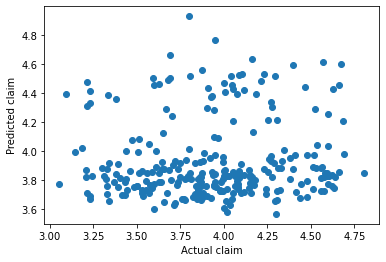

In [257]:
#plt.figure(figsize=(8,6))
plt.scatter(y1_test,y_pred2)
plt.xlabel('Actual claim')
plt.ylabel('Predicted claim')

In [258]:
regressor = LinearRegression()
regressor.fit(X1_test,y1_test)

LinearRegression()

In [259]:
Ins.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,northeast,northwest,southeast,southwest,BMIgroup,BMIgroup1,BPgroup,BPgroup1,claim_log
0,1,39.000000,0,23.2,91,0,0,1,1121.87,0,0,1,0,Standard,2,Above standard,3,3.049943
1,2,24.000000,0,30.1,87,1,0,1,1131.51,0,0,1,0,Moderate,3,Standard,2,3.053658
2,3,38.078652,0,33.3,82,0,0,1,1135.94,0,0,1,0,High,4,Standard,2,3.055355
3,4,38.078652,0,33.7,80,1,0,1,1136.40,0,1,0,0,High,4,Low,1,3.055531
4,5,38.078652,0,34.1,100,1,0,1,1137.01,0,1,0,0,High,4,Above standard,3,3.055764


In [273]:
import statsmodels.formula.api as smf

regressor = smf.ols(formula='claim_log~ smoker+ BPgroup1',data=Ins).fit()
regressor.conf_int()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              claim_log   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     192.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          4.10e-197
Time:                        01:06:39   Log-Likelihood:                -205.62
No. Observations:                1340   AIC:                             427.2
Df Residuals:                    1332   BIC:                             468.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.2596      0.042    101.435      0.000       4.177       4.342
BPgroup1[T.2]     0.0599      0.039      1.540      0.124      -0.016       0.136
BPgroup1[T.3]     0.0798      0.039      2.050      0.041       0.003       0.156
BPgroup1[T.4]     0.3172      0.043      7.331      0.000       0.232       0.402
BPgroup1[T.5]     0.3664      0.064      5.744      0.000       0.241       0.491
BPgroup1[T.6]     0.3995      0.067      5.969      0.000       0.268       0.531
BPgroup1[T.7]     0.3867      0.068      5.696      0.000       0.254       0.520
smoker           -0.5381      0.022    -24.423      0.000      -0.581      -0.495
==============================================================================
Omnibus:                       19.099   Durbin-Watson:                   0.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.735
Skew:                          -0.293   Prob(JB):                     5.18e-05
Kurtosis:                       2.903   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [263]:
pred_y_Ins=pd.DataFrame({'Actual claim':y1_test ,'Predicted claim':y_pred2, 'Difference': y1_test - y_pred2})
pred_y_Ins

,Actual claim,Predicted claim,Difference
12,3.094408,4.394133,-1.299725
306,3.646902,3.873785,-0.226882
318,3.656048,3.645526,0.010522
816,4.062741,3.830577,0.232164
157,3.412603,3.697164,-0.284561
...,...,...,...
714,4.001874,3.826244,0.175630
664,3.967715,4.089902,-0.122188
531,3.864811,3.766487,0.098324
537,3.867572,3.818589,0.048983


### Validation of linear regression assumption

#### 1. Multicolinearity :  Features must be independent

In [264]:
X1.head()

,const,age,gender,diabetic,children,smoker,northeast,northwest,southeast,southwest,BPgroup1
0,1.0,39.000000,0,0,0,1,0,0,1,0,3
1,1.0,24.000000,0,1,0,1,0,0,1,0,2
2,1.0,38.078652,0,0,0,1,0,0,1,0,2
3,1.0,38.078652,0,1,0,1,0,1,0,0,1
4,1.0,38.078652,0,1,0,1,0,1,0,0,3


In [265]:
Ins.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,northeast,northwest,southeast,southwest,BMIgroup,BMIgroup1,BPgroup,BPgroup1,claim_log
0,1,39.000000,0,23.2,91,0,0,1,1121.87,0,0,1,0,Standard,2,Above standard,3,3.049943
1,2,24.000000,0,30.1,87,1,0,1,1131.51,0,0,1,0,Moderate,3,Standard,2,3.053658
2,3,38.078652,0,33.3,82,0,0,1,1135.94,0,0,1,0,High,4,Standard,2,3.055355
3,4,38.078652,0,33.7,80,1,0,1,1136.40,0,1,0,0,High,4,Low,1,3.055531
4,5,38.078652,0,34.1,100,1,0,1,1137.01,0,1,0,0,High,4,Above standard,3,3.055764


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Ins_test.drop("claim_log,",axis=1).columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_test.drop("price",axis=1).values, i)
                          for i in range(len(df_test.drop("price",axis=1).columns))]
  
print(vif_data.to_string())

In [278]:

def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF_Value"] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return(vif)

In [291]:
import pandas as pd

features = Ins.iloc[:,1:8]

calculate_vif(features)

,features,VIF_Value
0,age,13.425854
1,gender,2.347558
2,bmi,24.475446
3,bloodpressure,28.309809
4,diabetic,2.091446
5,children,1.804265
6,smoker,4.533633


#### Outcome: 

We observe the VIF value is higher for pairs "BMI" and "Blood pressure". 
Therefore, indicating that said variables have collinearity and we will have to drop one of the variables for the accuracy of the model.

One approach to remove the variable is to check the co-relation of BMI and blood pressure with target variable - claims

We high BP has higher co-relation with claim(0.53) as compared to BMI with claim(0.19); Therefore, it would be better to drop BMI variable

#### 2. Normality of Residual: Errors or residuals must be normally distributed

<AxesSubplot:xlabel='claim_log', ylabel='Density'>

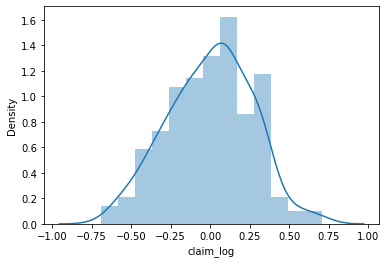

In [268]:
sns.distplot(residual_1)

((array([-2.79649277, -2.4966039 , -2.32650869, -2.20514436, -2.10955733,
         -2.03007379, -1.96166434, -1.90136582, -1.84727945, -1.79811247,
         -1.7529434 , -1.7110913 , -1.67203817, -1.63538038, -1.60079708,
         -1.56802882, -1.53686267, -1.50712165, -1.47865698, -1.45134236,
         -1.42506958, -1.39974522, -1.37528804, -1.3516269 , -1.32869918,
         -1.30644941, -1.28482825, -1.26379157, -1.24329979, -1.22331718,
         -1.20381147, -1.18475332, -1.16611605, -1.14787525, -1.1300086 ,
         -1.11249556, -1.09531724, -1.07845621, -1.06189633, -1.04562265,
         -1.02962128, -1.01387928, -0.99838461, -0.98312599, -0.96809291,
         -0.95327549, -0.93866447, -0.92425113, -0.91002729, -0.89598523,
         -0.88211765, -0.86841767, -0.85487877, -0.8414948 , -0.82825989,
         -0.81516849, -0.80221533, -0.7893954 , -0.77670391, -0.76413631,
         -0.75168825, -0.73935561, -0.7271344 , -0.71502084, -0.70301131,
         -0.69110233, -0.67929056, -0.

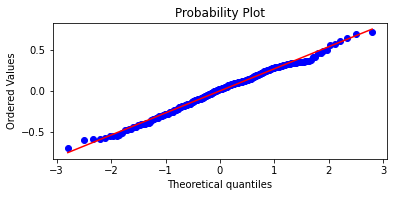

In [269]:
## Another way to validate normality of errors using QQ plot
fig,ax=plt.subplots(figsize=(6,2.5))
stats.probplot(residual_1,plot=ax,fit=True)

In [270]:
np.mean(residual_1)

-1.0936525317203034e-16

#### 3. Homoscedasitcity : Errors or residual must have constant variance

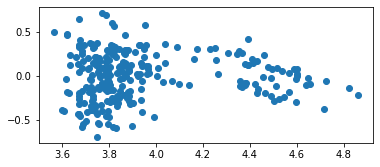

In [271]:
fig,ax = plt.subplots(figsize=(6,2.5))
_=ax.scatter(y_pred3, residual_1)

#### 4. No autocorrelation of residuals : Residuals must be independent

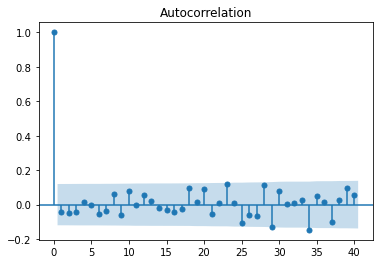

In [272]:
acf=smt.graphics.plot_acf(residual_1,lags=40,alpha=0.05)
acf.show()

In [274]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residual_1)

2.062120777014863

N0t co-related since DW value is 2